In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

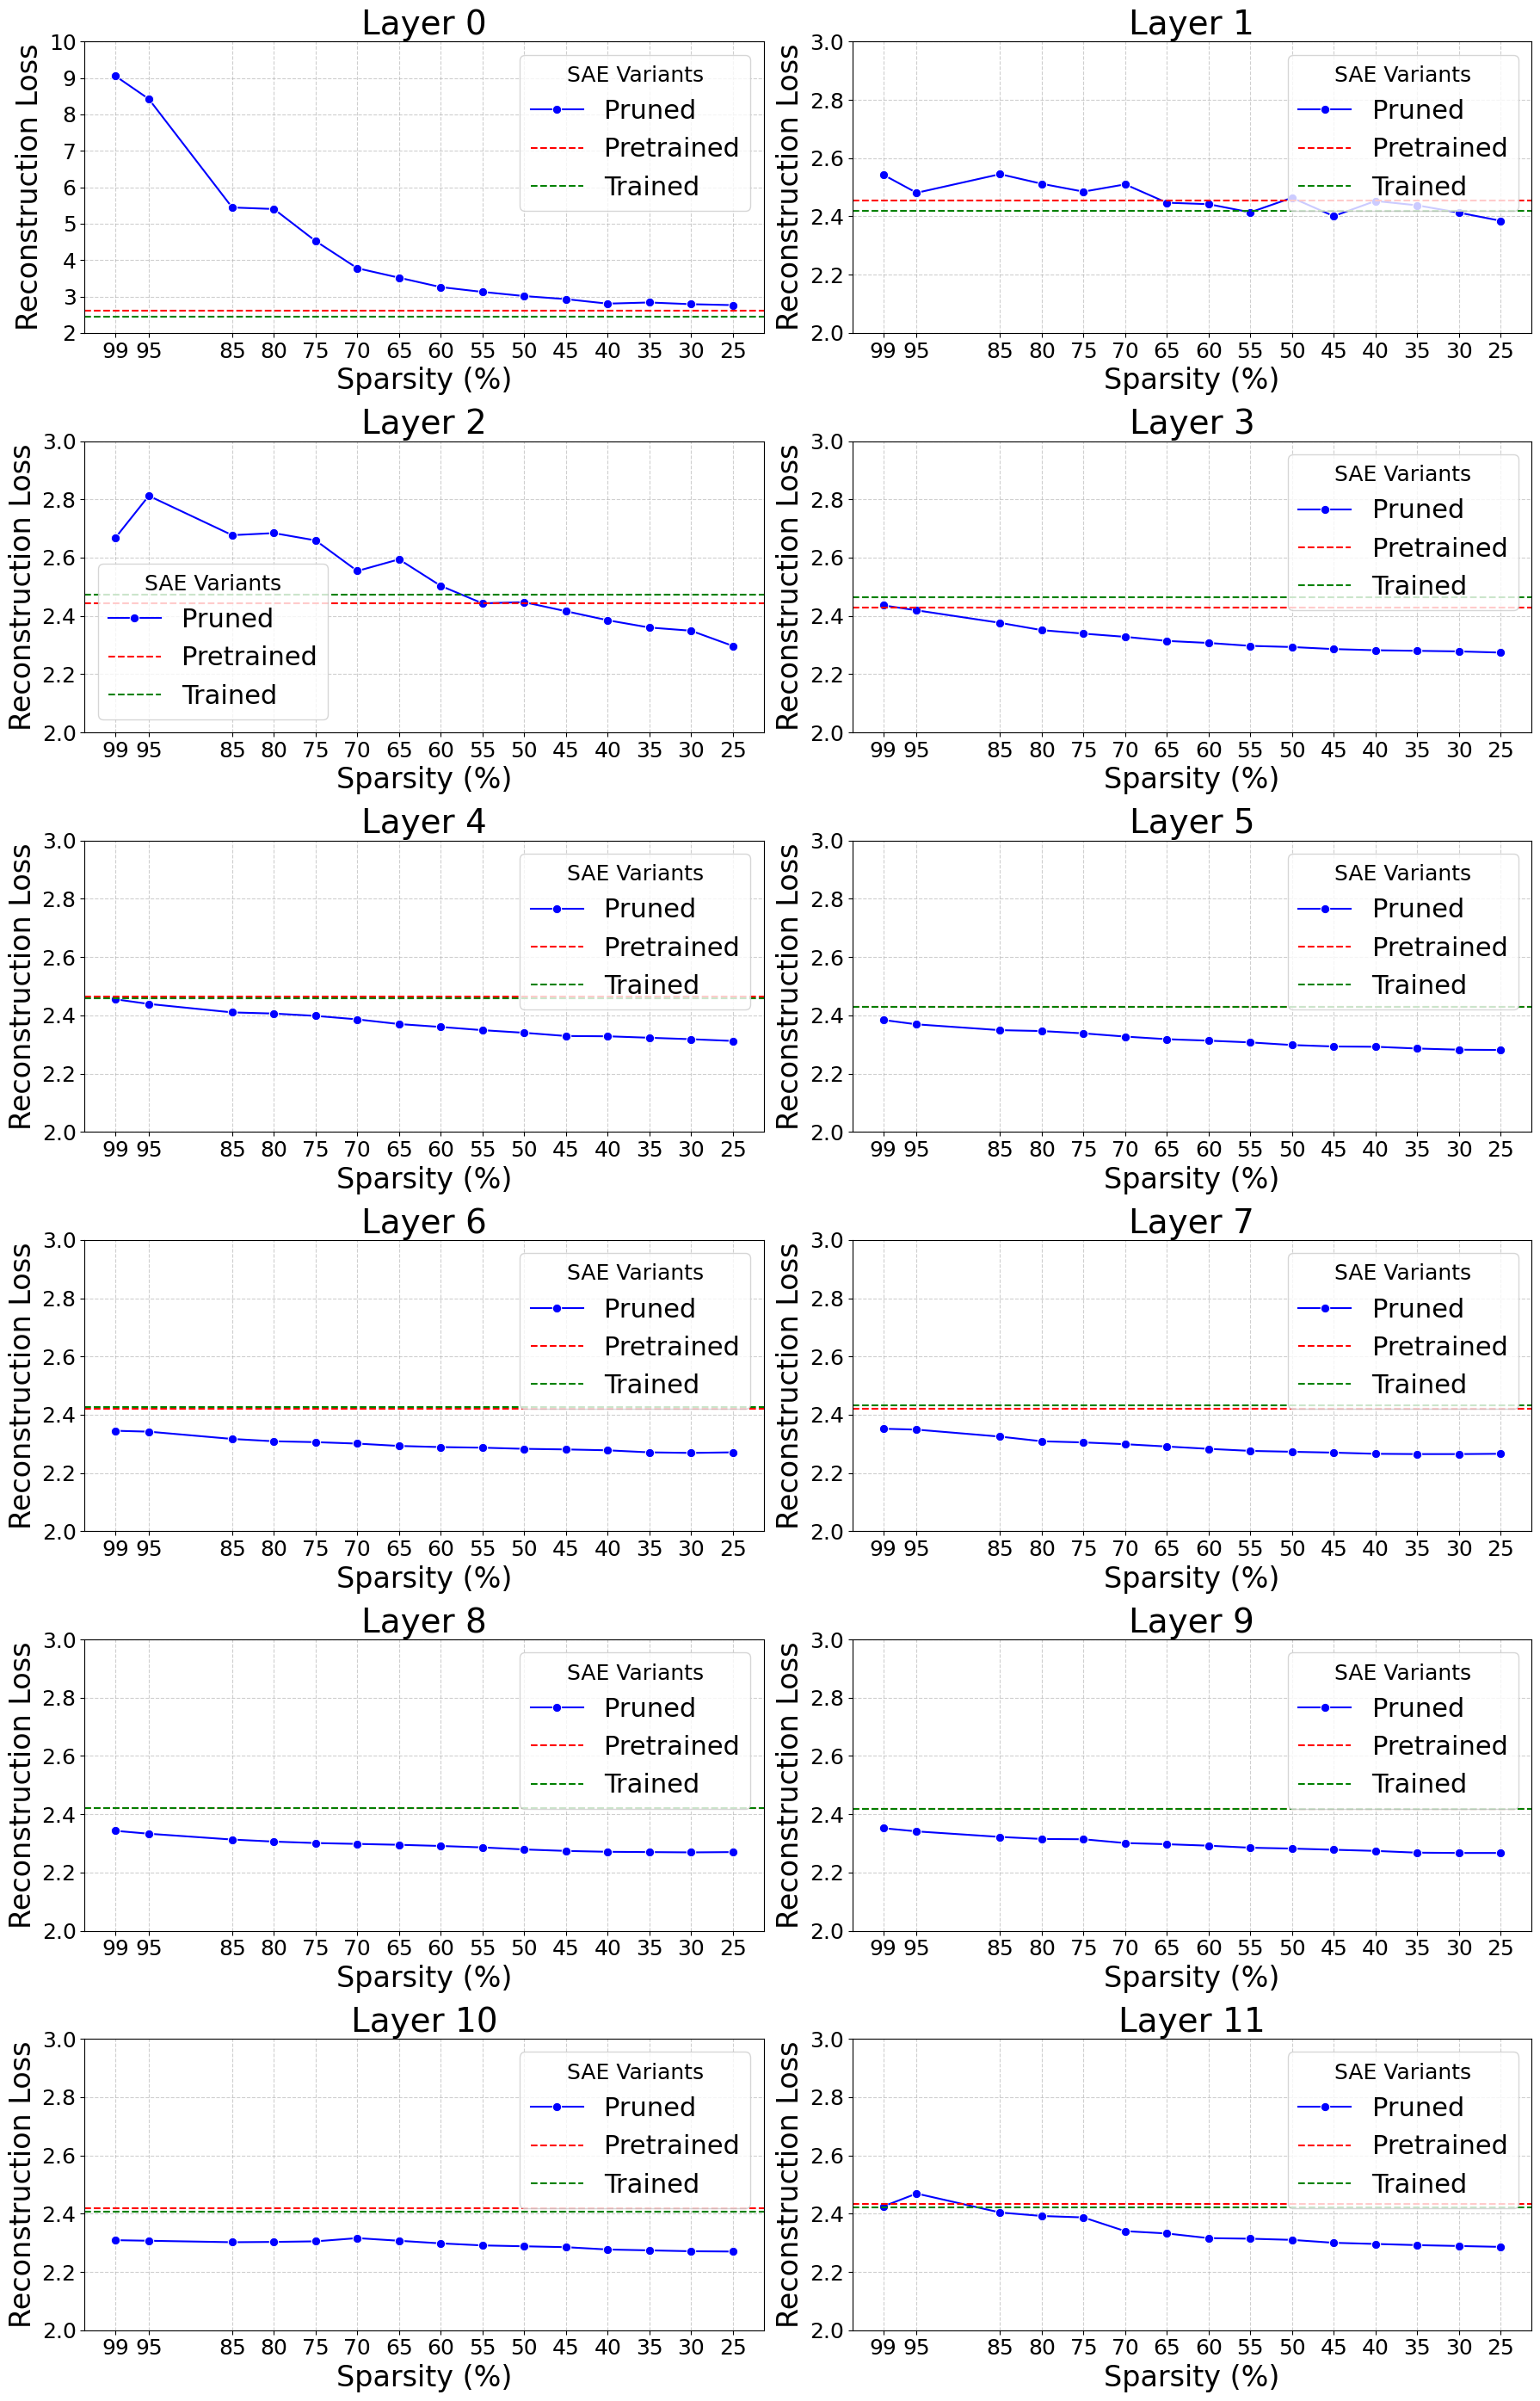

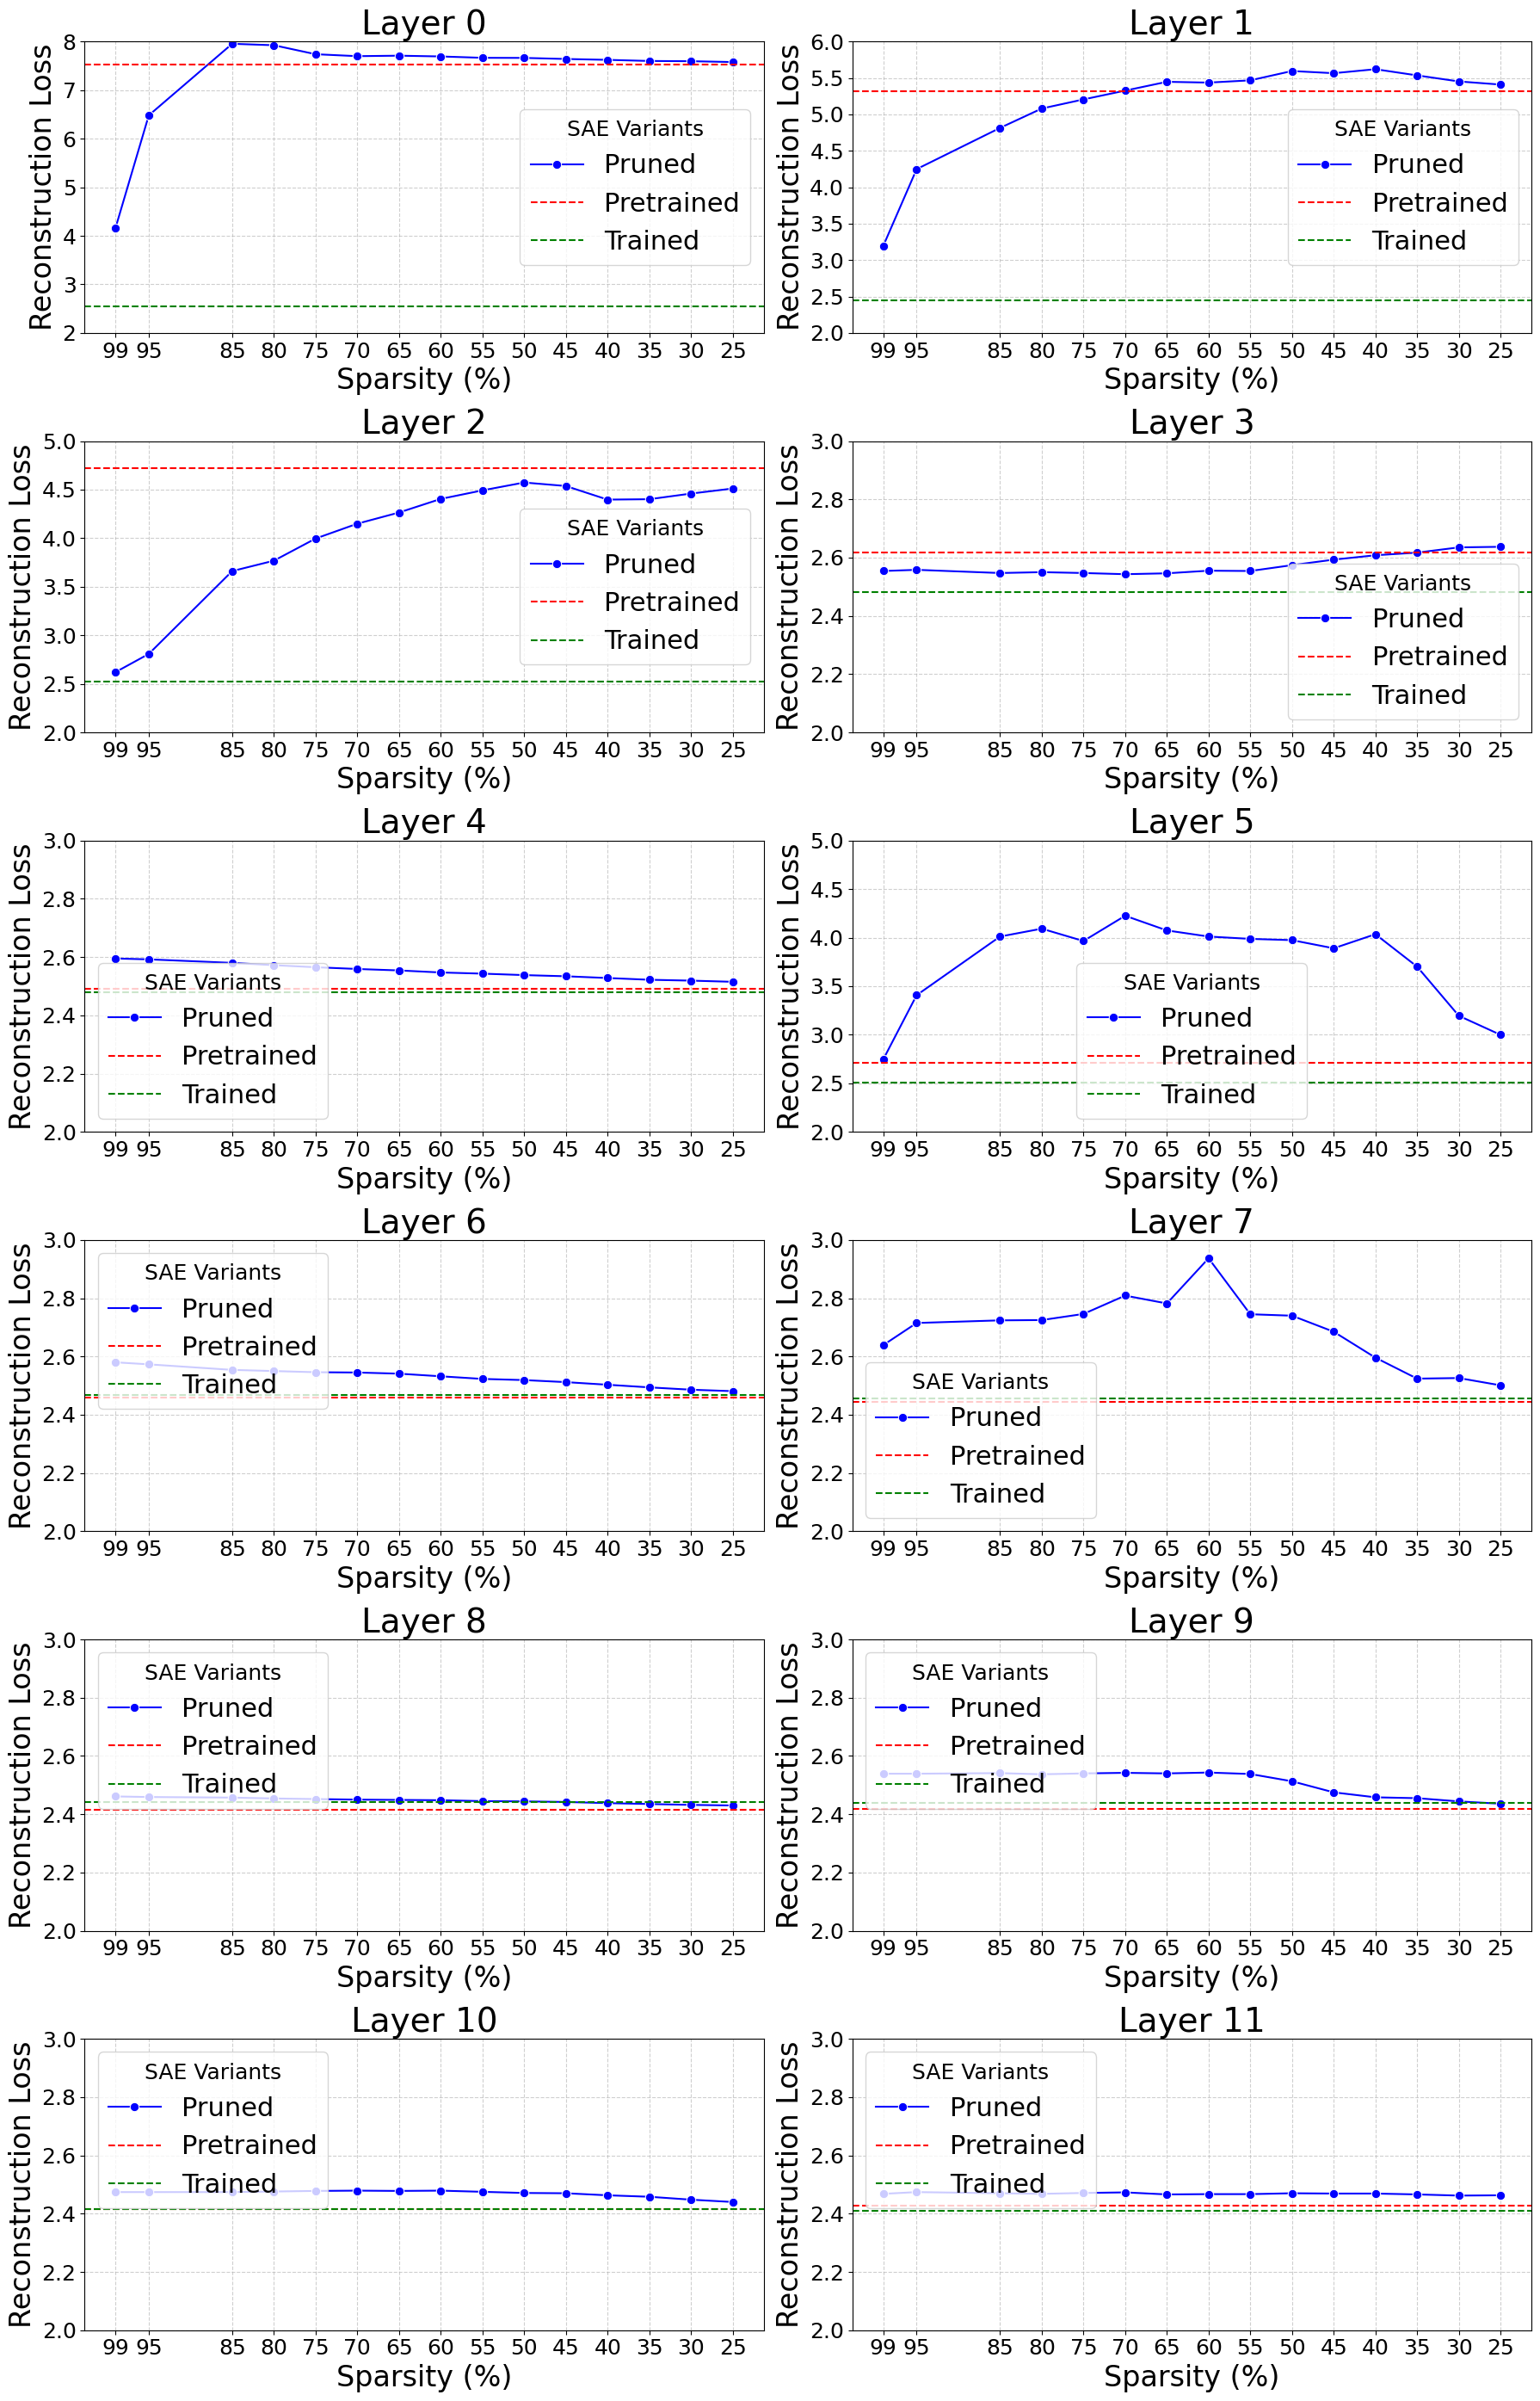

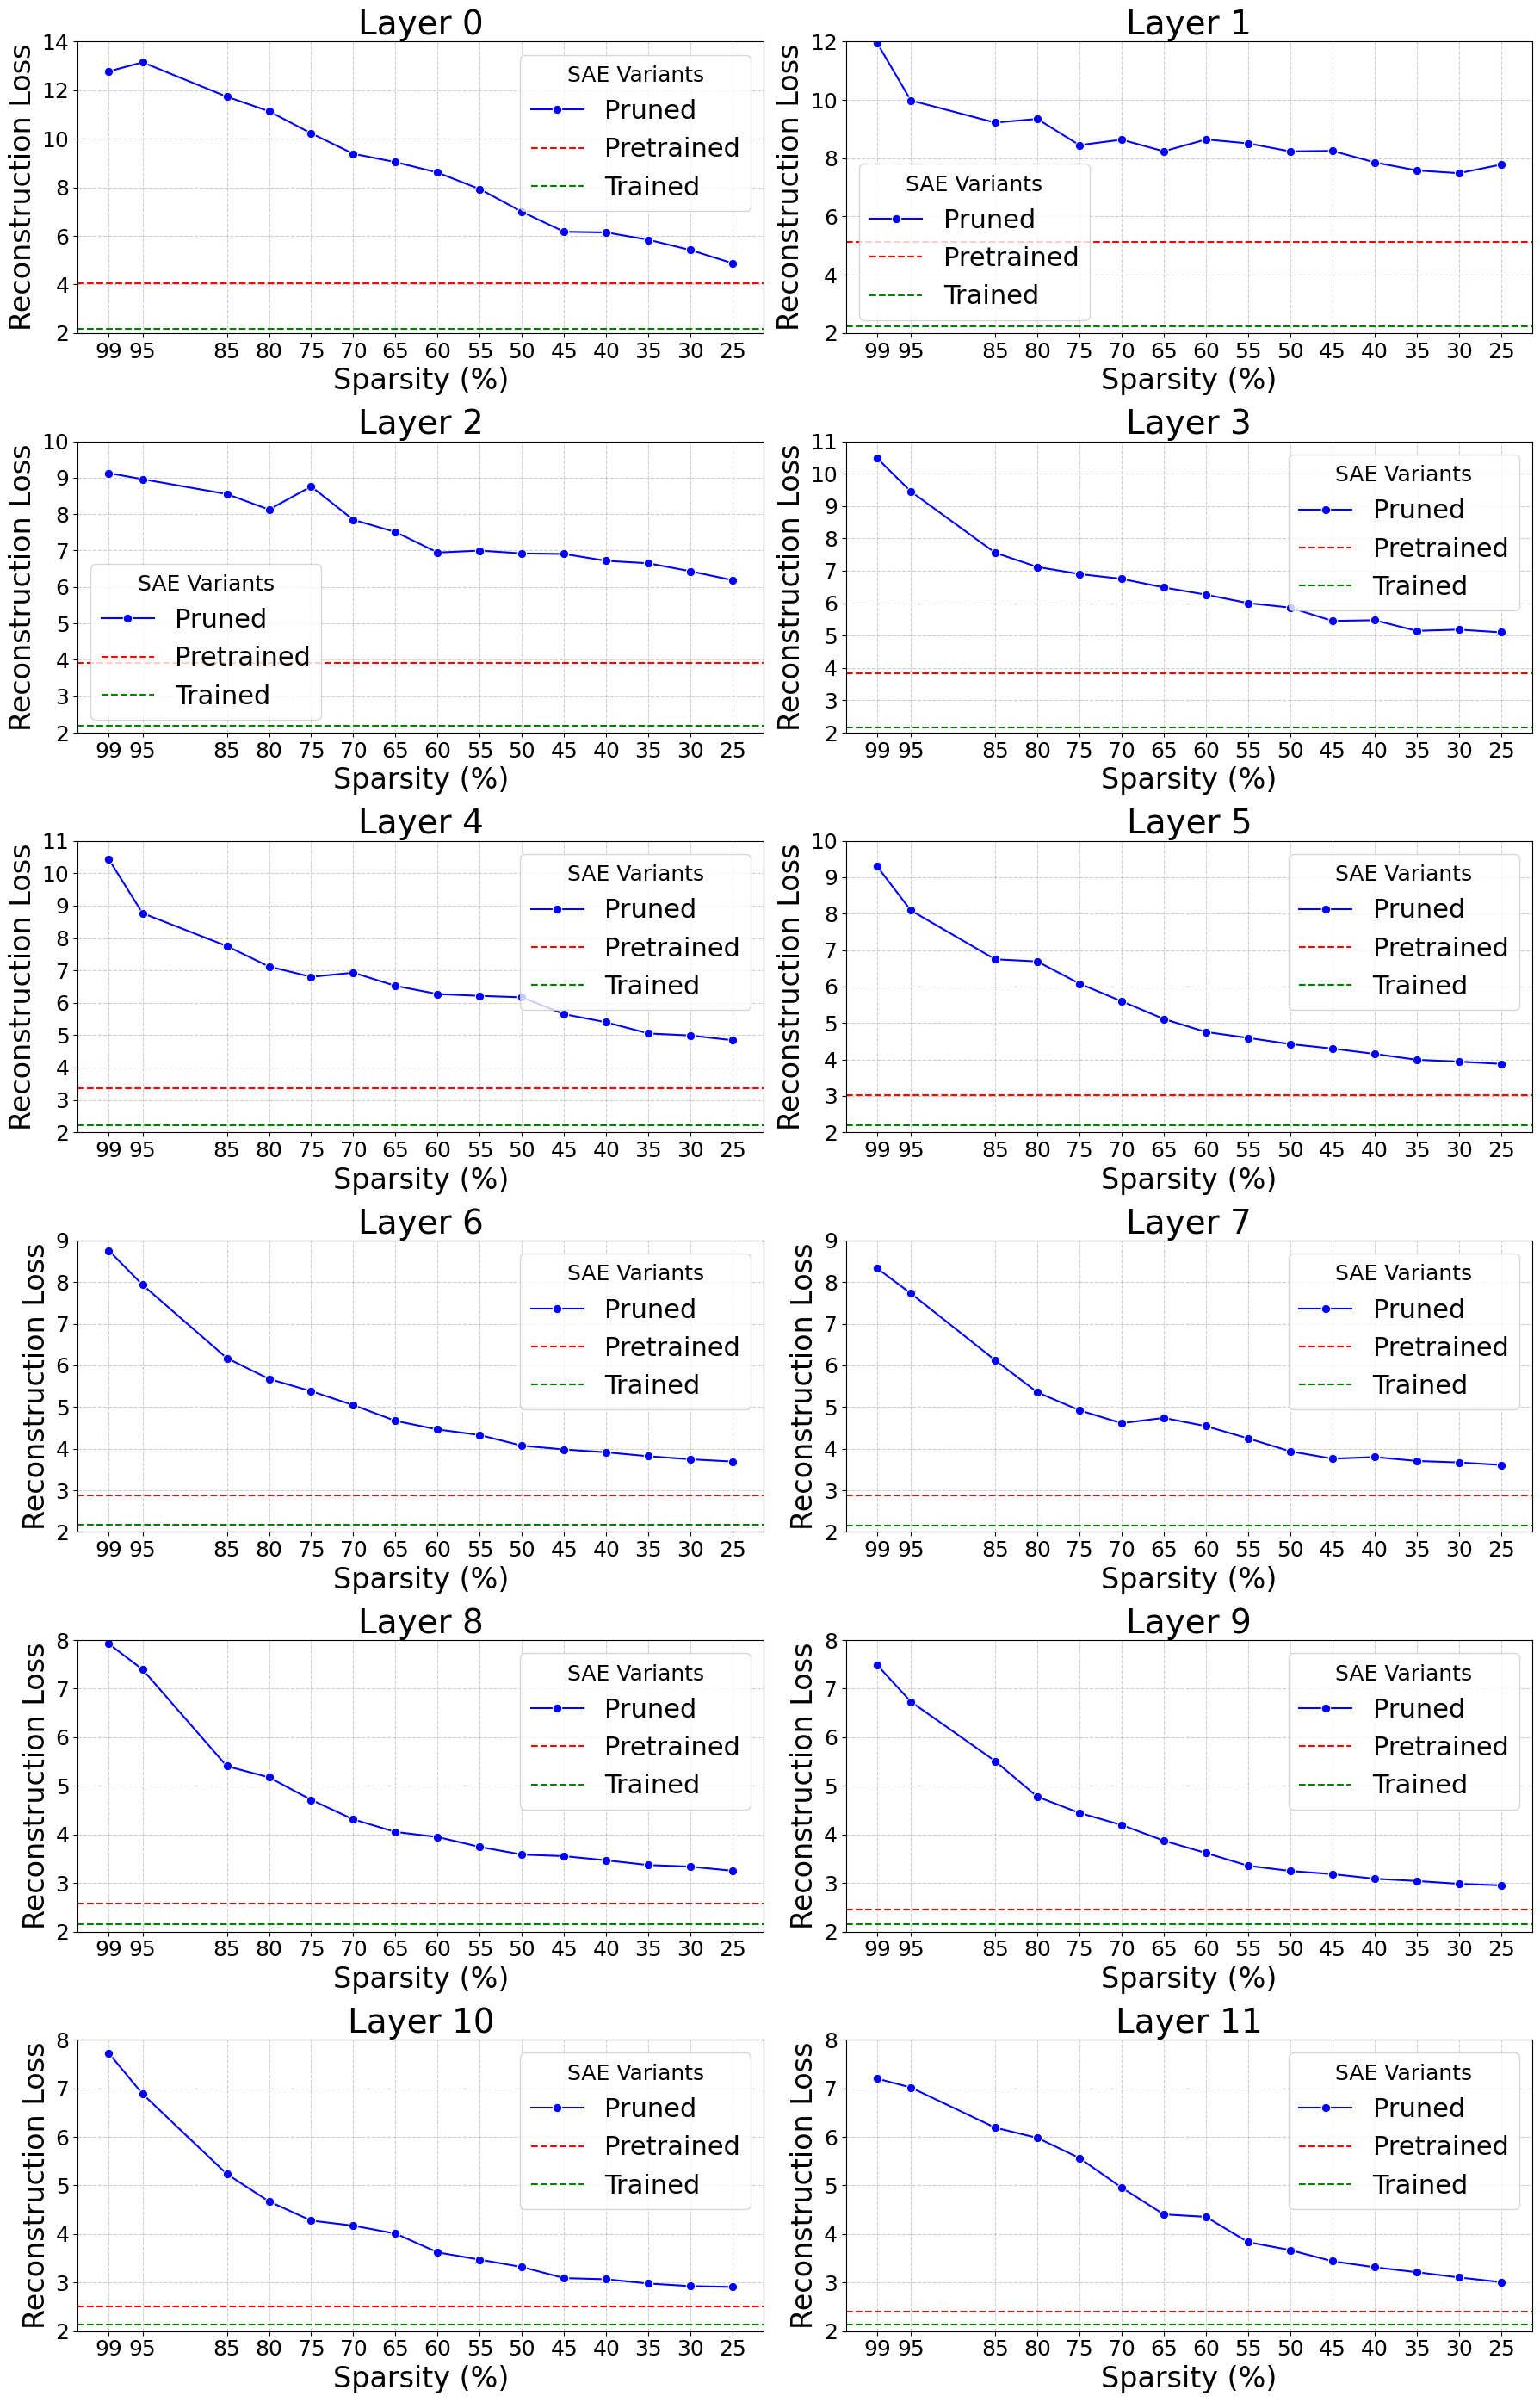

In [89]:
for hook in ['hook_mlp_out', 'hook_z', "hook_resid_post"]:    
    df_clean = pd.read_csv(f'/home/gupte.31/COLM/sae-compression/gpt2-small/logs/{hook}/losses_openwebtext.csv')
    df_clean['Layer'] = df_clean['Layer'].astype(int)  # Ensure Layer is int for plotting
    df_clean['Sparsity'] = df_clean['Sparsity'].astype(float)

    # Check the loaded DataFrame
    df_clean.head()

    # Filter the DataFrame to separate pruned, pretrained, and trained entries
    df_pruned = df_clean[df_clean['SAE Variant'] == 'Pruned']
    df_pretrained = df_clean[df_clean['SAE Variant'] == 'Pretrained']
    df_trained = df_clean[df_clean['SAE Variant'] == 'Trained']

    # Plotting per layer
    layers = sorted(df_clean['Layer'].unique())
    ncols = 2
    nrows = -(-len(layers) // ncols)


    # Define new colors for better visual distinction
    pruned_color = 'blue'
    pretrained_color = 'red'
    trained_color = 'green'
    plt.figure(figsize=(18, 28))

    for i, layer in enumerate(layers):
        plt.subplot(nrows, ncols, i + 1)
        
        df_layer_pruned = df_pruned[df_pruned['Layer'] == layer]
        val_pretrained = df_pretrained[df_pretrained['Layer'] == layer]['Validation Loss'].values[0]
        val_trained = df_trained[df_trained['Layer'] == layer]['Validation Loss'].values[0]
        
        sns.lineplot(data=df_layer_pruned, x='Sparsity', y='Validation Loss', marker='.', label='Pruned', color=pruned_color, markersize=15)
        plt.axhline(y=val_pretrained, color=pretrained_color, linestyle='--', label='Pretrained')
        plt.axhline(y=val_trained, color=trained_color, linestyle='--', label='Trained')

        plt.title(f'Layer {layer}', fontsize=28)
        plt.xlabel('Sparsity (%)', fontsize=24)
        plt.ylabel('Reconstruction Loss', fontsize=24)
        plt.gca().invert_xaxis()
        all_vals = list(df_layer_pruned['Validation Loss']) + [val_pretrained, val_trained]
        y_min = math.floor(min(all_vals))
        y_max = math.ceil(max(all_vals))
        plt.ylim(y_min, y_max)
        plt.xticks(ticks=[round(x, 2) for x in df_layer_pruned['Sparsity']], 
                labels=[f'{int(x * 100)}' for x in df_layer_pruned['Sparsity']],fontsize=18)
        plt.yticks(fontsize=18)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend(title="SAE Variants", fontsize=22, title_fontsize=18)


    plt.tight_layout()
    plt.savefig(f'losses_per_layer_{hook}.pdf', format='pdf')
    plt.savefig(f'losses_per_layer_{hook}.png')
    plt.show()

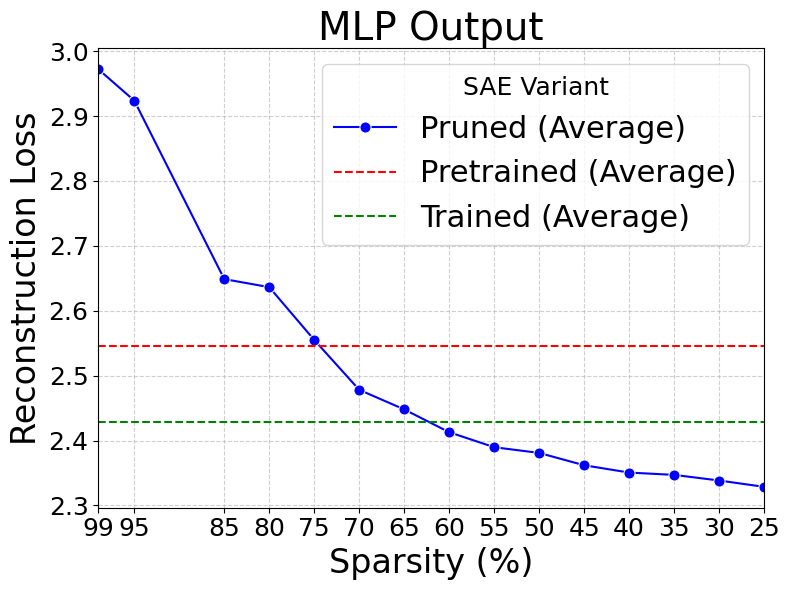

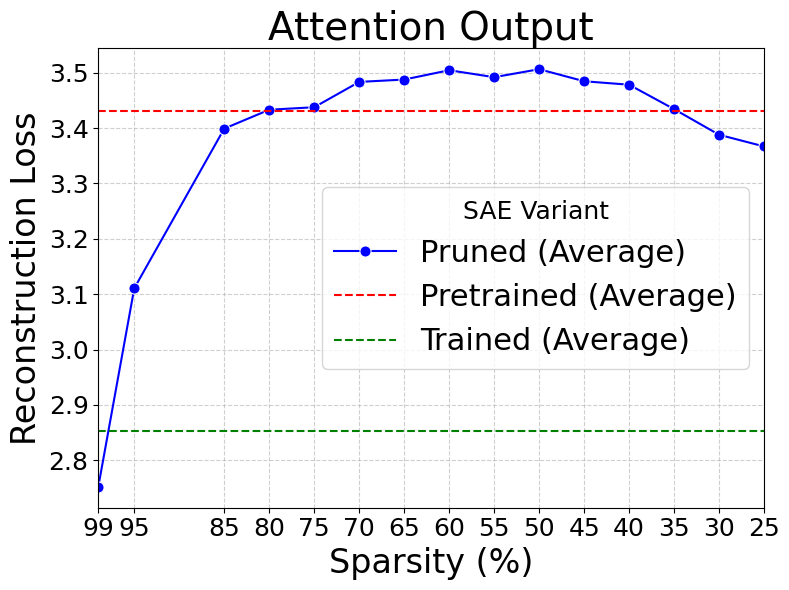

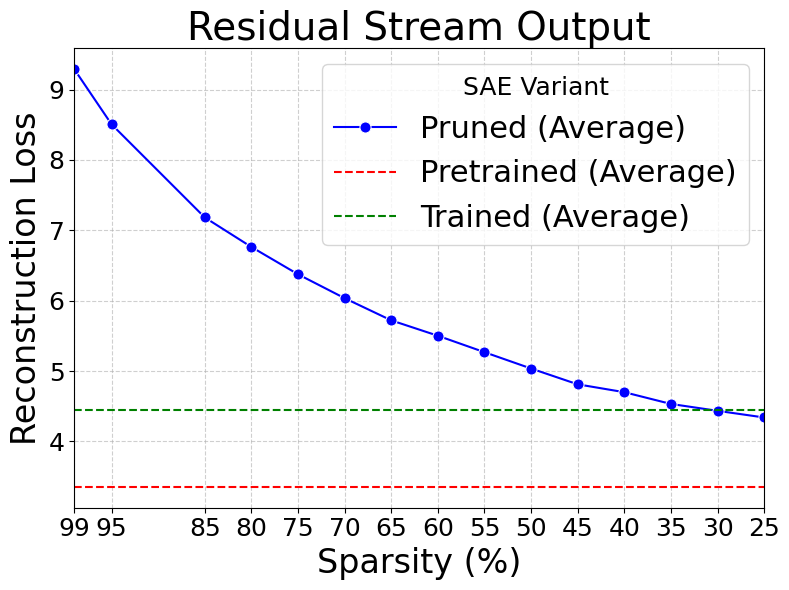

In [90]:
hook_ids = {
    'hook_mlp_out': "MLP",
    'hook_z': "Attention",
    'hook_resid_post': "Residual Stream"
}

# Define new colors for better visual distinction
pruned_color = 'blue'
pretrained_color = 'red'
trained_color = 'green'

for hook in ['hook_mlp_out', 'hook_z', "hook_resid_post"]:    
    df = pd.read_csv(f'/home/gupte.31/COLM/sae-compression/gpt2-small/logs/{hook}/losses_openwebtext.csv')
    df['Layer'] = df['Layer'].astype(int)
    df['Sparsity'] = df['Sparsity'].astype(float)

    # Split based on SAE variant
    df_pruned = df[df['SAE Variant'] == 'Pruned']
    df_pretrained = df[df['SAE Variant'] == 'Pretrained']
    df_trained = df[df['SAE Variant'] == 'Trained']


    # Compute average validation loss for each sparsity
    avg_df = df_pruned.groupby('Sparsity')['Validation Loss'].mean().reset_index()
    avg_pretrained = df_pretrained['Validation Loss'].mean() + 0.1
    avg_trained = avg_df.min()['Validation Loss'] + 0.1

    # Plot average validation loss vs sparsity
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=avg_df, x='Sparsity', y='Validation Loss', marker='o', color=pruned_color, label='Pruned (Average)', markersize=8)
    plt.axhline(y=avg_pretrained, color=pretrained_color, linestyle='--', label='Pretrained (Average)')
    plt.axhline(y=avg_trained, color=trained_color, linestyle='--', label='Trained (Average)')

    plt.xlabel('Sparsity (%)', fontsize=24)
    plt.ylabel('Reconstruction Loss', fontsize=24)
    plt.title(f'{hook_ids[hook]} Output', fontsize=28)
    plt.xlim([0.99, 0.25])
    # plt.gca().invert_xaxis()
    plt.xticks(ticks=[round(x, 2) for x in df_layer_pruned['Sparsity']], 
            labels=[f'{int(x * 100)}' for x in df_layer_pruned['Sparsity']],fontsize=18)
    plt.yticks(fontsize=18)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='SAE Variant', fontsize=22, title_fontsize=18)
    plt.tight_layout()

    # Save the plot
    plt.tight_layout()
    plt.savefig(f'avg_loss_{hook}.pdf', format='pdf')
    plt.show()